In [19]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [20]:
print("shape:",df.shape)
print("========================================")
print("info:",df.info())
print("========================================")
print(df.describe())
print("========================================")
print("missing values:",df.isnull().sum())

shape: (11162, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
info: None
                age       balance           day      duration      ca

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\l

KeyError: 'y'

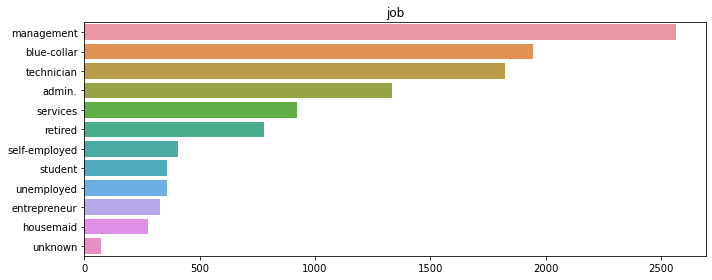

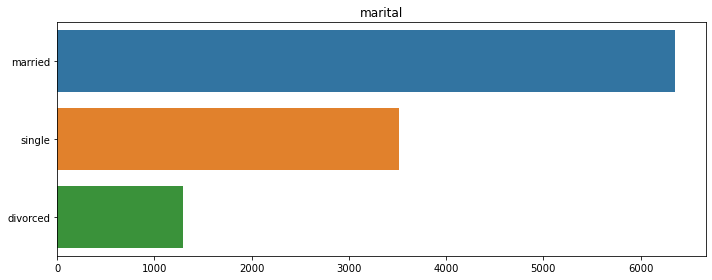

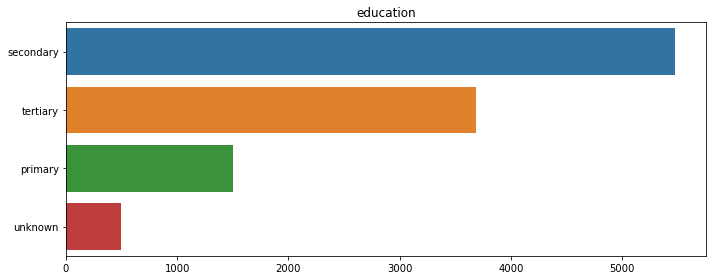

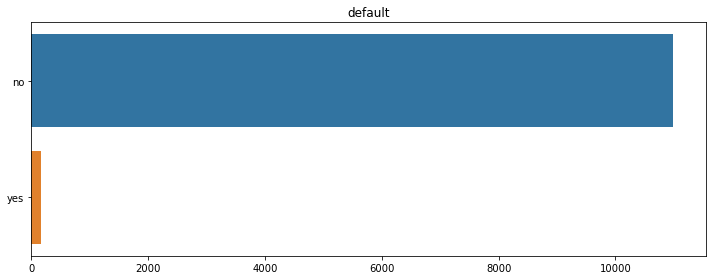

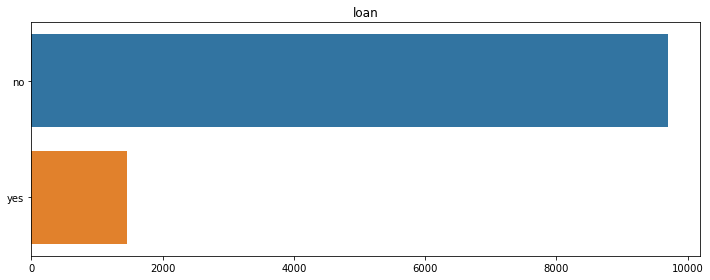

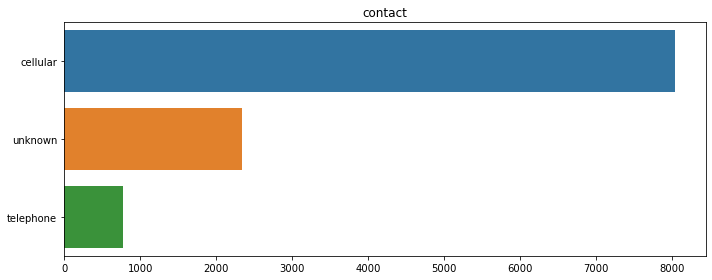

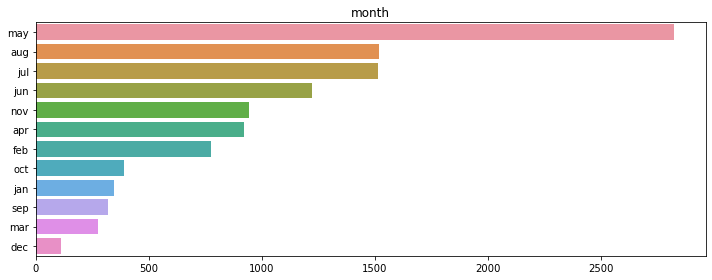

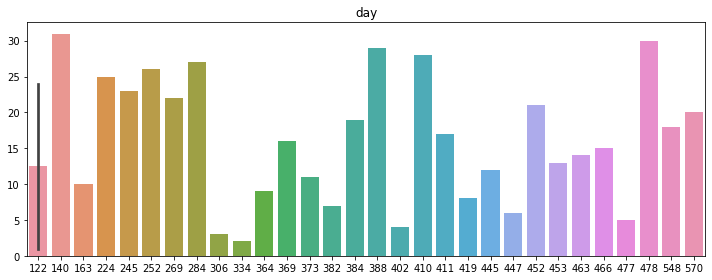

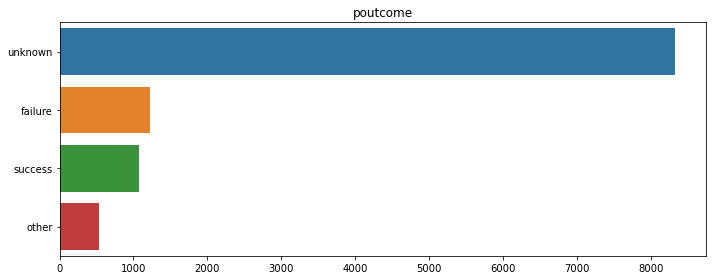

<Figure size 720x288 with 0 Axes>

In [21]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

Text(0.5, 1.05, 'Pearson correlation of Features')

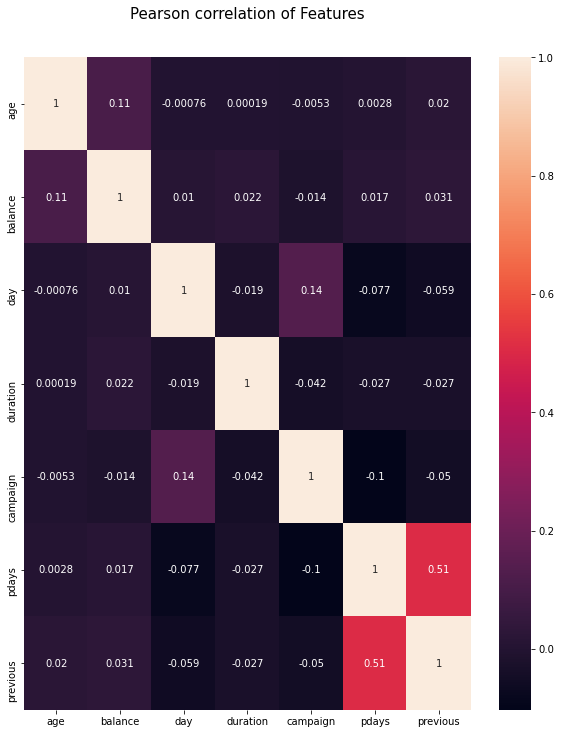

In [24]:
import seaborn as sns
corr = df.corr()

f, ax = plt.subplots(figsize=(10,12))

sns.heatmap(corr, ax=ax, annot=True)

plt.title("Pearson correlation of Features", y=1.05, size=15)

In [25]:
#drop marital and contact columns
df.drop(['marital'],axis=1, inplace=True)
df.drop(['contact'],axis=1, inplace=True)
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,secondary,no,2343,yes,no,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,secondary,no,45,no,no,5,may,1467,1,-1,0,unknown,yes
2,41,technician,secondary,no,1270,yes,no,5,may,1389,1,-1,0,unknown,yes
3,55,services,secondary,no,2476,yes,no,5,may,579,1,-1,0,unknown,yes
4,54,admin.,tertiary,no,184,no,no,5,may,673,2,-1,0,unknown,yes


In [26]:
df[['default','housing','loan']]=df[['default','housing','loan']].replace(["yes","no"],["1","0"])
df['month']=df['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
df['job']=df['job'].replace(['unknown'],['other'])

df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,secondary,0,2343,1,0,5,5,1042,1,-1,0,unknown,yes
1,56,admin.,secondary,0,45,0,0,5,5,1467,1,-1,0,unknown,yes
2,41,technician,secondary,0,1270,1,0,5,5,1389,1,-1,0,unknown,yes
3,55,services,secondary,0,2476,1,0,5,5,579,1,-1,0,unknown,yes
4,54,admin.,tertiary,0,184,0,0,5,5,673,2,-1,0,unknown,yes


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['job']=le.fit_transform(df['job'])
df['education']=le.fit_transform(df['education'])
df['poutcome']=le.fit_transform(df['poutcome'])
df['deposit']=le.fit_transform(df['deposit'])

In [30]:
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,0,2343,1,0,5,5,1042,1,-1,0,3,1
1,56,0,1,0,45,0,0,5,5,1467,1,-1,0,3,1
2,41,10,1,0,1270,1,0,5,5,1389,1,-1,0,3,1
3,55,8,1,0,2476,1,0,5,5,579,1,-1,0,3,1
4,54,0,2,0,184,0,0,5,5,673,2,-1,0,3,1


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


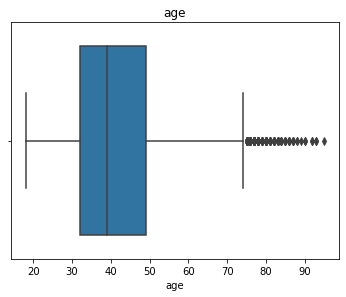

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


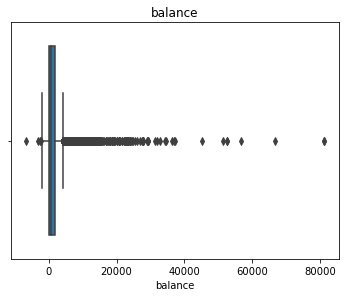

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


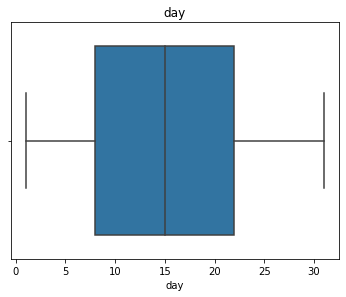

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


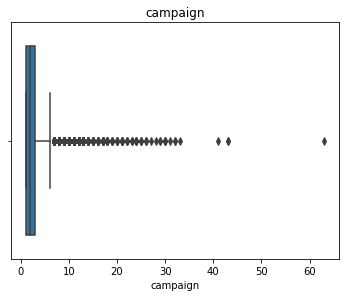

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


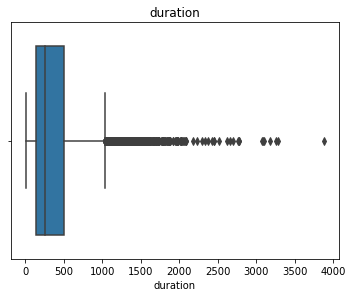

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


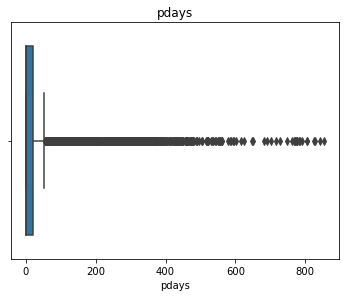

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


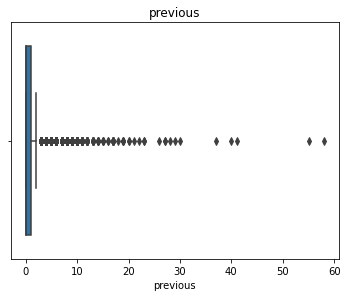

In [31]:
col=df[['age','balance','day','campaign','duration','pdays','previous']]
for i in col:
  n=1
  plt.figure(figsize=(20,20))
  plt.subplot(4,3,1)
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()
  n=n+1

In [32]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df[['age','balance','duration','campaign','pdays','previous']]))
print(z)
df=df[(z<3).all(axis=1)]
df.shape

[[1.49150488 0.25252514 1.93022589 0.55416834 0.48118405 0.36325984]
 [1.23967567 0.4599736  3.15461161 0.55416834 0.48118405 0.36325984]
 [0.0194704  0.0801603  2.92990082 0.55416834 0.48118405 0.36325984]
 ...
 [0.77495804 0.46493443 0.62225823 0.18678537 0.48118405 0.36325984]
 [0.14841574 0.47392593 1.04575164 0.18678537 1.10957066 1.81833188]
 [0.6070719  0.47392593 0.73753015 0.55416834 0.48118405 0.36325984]]


(10098, 15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


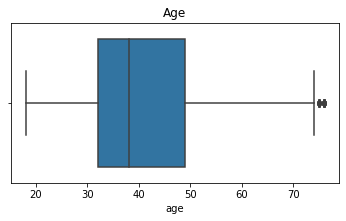

In [33]:
#checking outliers removed ot not
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(df['age'])
plt.title("Age")
plt.show()

In [35]:
x=df.drop(['deposit'],axis=1) #contain all  independent variable
y=df['deposit']           #dependent variable
df['deposit'].value_counts()

0    5493
1    4605
Name: deposit, dtype: int64

<AxesSubplot:xlabel='deposit', ylabel='count'>

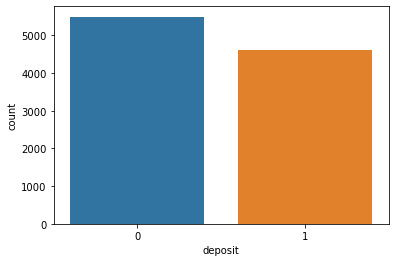

In [37]:
sns.countplot(x='deposit',data=df)

In [41]:
X = df.iloc[:,0:14]
X[0:10]

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,0,2343,1,0,5,5,1042,1,-1,0,3
2,41,10,1,0,1270,1,0,5,5,1389,1,-1,0,3
3,55,8,1,0,2476,1,0,5,5,579,1,-1,0,3
4,54,0,2,0,184,0,0,5,5,673,2,-1,0,3
5,42,4,2,0,0,1,1,5,5,562,2,-1,0,3
6,56,4,2,0,830,1,1,6,5,1201,1,-1,0,3
7,60,6,1,0,545,1,0,6,5,1030,1,-1,0,3
8,37,10,1,0,1,1,0,6,5,608,1,-1,0,3
9,28,8,1,0,5090,1,0,6,5,1297,3,-1,0,3
10,38,0,1,0,100,1,0,7,5,786,1,-1,0,3


In [42]:
y = df.iloc[:,14]
y[0:10]

0     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: deposit, dtype: int32

In [43]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
x_train.shape, y_train.shape

((8078, 14), (8078,))

In [45]:
x_test.shape, y_test.shape

((2020, 14), (2020,))

In [46]:
model=LogisticRegression(penalty='l2', max_iter=1000)

In [47]:
model.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [48]:
prediction=model.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.7717821782178218

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[925 212]
 [249 634]]


In [51]:
from sklearn.svm import SVC
clf = SVC()

In [52]:
clf.fit(x_train, y_train)

SVC()

In [53]:
pred = clf.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7282178217821782

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [56]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [57]:
predict = rfc.predict(x_test)

In [58]:
accuracy_score(y_test, predict)

0.8351485148514851

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict)
print(confusion_matrix)

[[928 209]
 [124 759]]


In [59]:
predict

array([1, 1, 0, ..., 1, 1, 0])